# 📚 Imports

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, MaxPooling2D, Conv2D, Dropout
from tensorflow.keras.applications.inception_v3 import InceptionV3

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 📖 Data

In [2]:
data_dir = '/kaggle/input/monkeys/Monkeys'

# 🧬 Preprocessing Image

In [3]:
# Set the input parameters
data = tf.keras.preprocessing.image_dataset_from_directory(data_dir)
num_images = data.cardinality().numpy() * 32
img_width = 160
img_height = 160
n_classes = 5

# Create the ImageDataGenerator object
datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.3,
        zoom_range = 0.25,
        horizontal_flip = True,
        fill_mode = 'nearest',
        validation_split = 0.20)

Found 500 files belonging to 5 classes.


# 🖼️ Image Generator

In [4]:
# Read original images from input directory
train_data = datagen.flow_from_directory(
    data_dir,
    target_size = (img_width, img_height),
    seed = 0,
    color_mode = 'rgb',
    class_mode = 'categorical',
    subset = 'training')

val_data = datagen.flow_from_directory(
    data_dir,
    target_size = (img_width, img_height),
    seed = 0,
    color_mode = 'rgb',
    class_mode = 'categorical',
    subset = 'validation')

Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


# 🐒 Random images

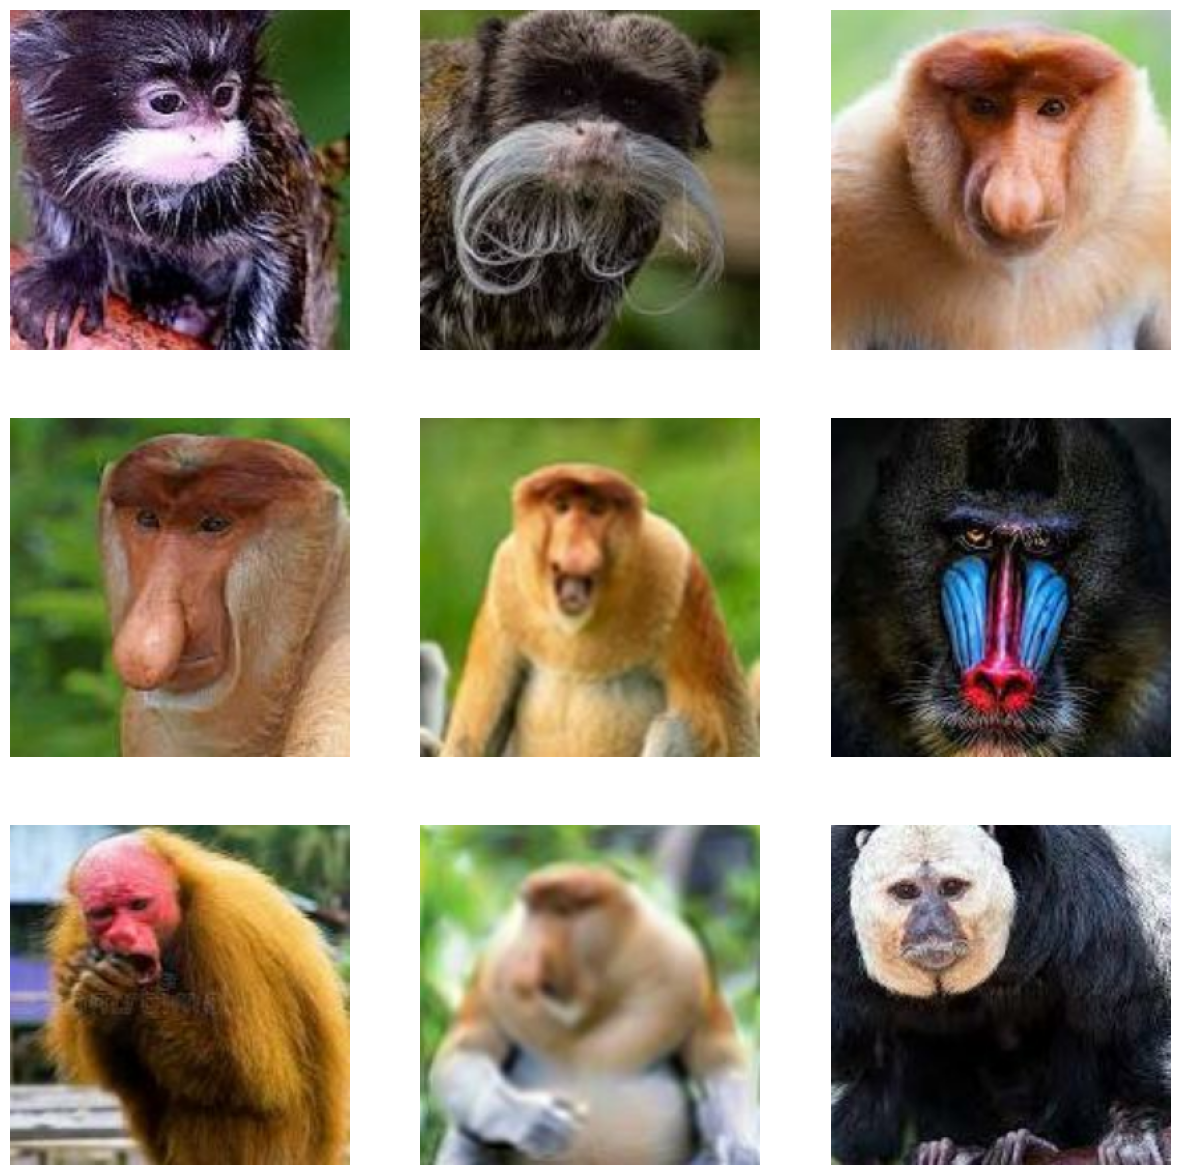

In [5]:
plt.figure(figsize = (15,15))
for images, labels in data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        ax.imshow(images[i].numpy().astype('uint8'))
        ax.axis('off')

 # Pretrained InceptionV3

In [6]:
pre_trained = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (img_width, img_height, 3))

for layer in pre_trained.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 1s 0us/step


# 🤖 Model Architecture

In [7]:
# Model 
model = Sequential([
    pre_trained,
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(n_classes, activation = 'softmax')
])
model.compile(optimizer = 'Adamax', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 64)                1179712   
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 22,982,821
Trainable params: 1,180,037
Non-trainable params: 21,802,784
_________________________________________________________________


# 📋 Training and Results

In [8]:
history = model.fit(train_data, epochs = 15, validation_data = val_data)

Epoch 1/15
13/13 [==============================] - 27s 2s/step - loss: 4.6219 - accuracy: 0.6300 - val_loss: 1.0022 - val_accuracy: 0.7600
Epoch 2/15
13/13 [==============================] - 48s 4s/step - loss: 0.3279 - accuracy: 0.8875 - val_loss: 0.4551 - val_accuracy: 0.8500
Epoch 3/15
13/13 [==============================] - 15s 1s/step - loss: 0.1697 - accuracy: 0.9500 - val_loss: 0.0785 - val_accuracy: 0.9700
Epoch 4/15
13/13 [==============================] - 14s 1s/step - loss: 0.0499 - accuracy: 0.9875 - val_loss: 0.1041 - val_accuracy: 0.9500
Epoch 5/15
13/13 [==============================] - 16s 1s/step - loss: 0.0449 - accuracy: 0.9875 - val_loss: 0.0614 - val_accuracy: 0.9800
Epoch 6/15
13/13 [==============================] - 15s 1s/step - loss: 0.0210 - accuracy: 0.9950 - val_loss: 0.0384 - val_accuracy: 1.0000
Epoch 7/15
13/13 [==============================] - 16s 1s/step - loss: 0.0322 - accuracy: 0.9925 - val_loss: 0.0242 - val_accuracy: 1.0000
Epoch 8/15
13/13 [==

## Accuracy

In [9]:
best_acc = np.max(history.history['accuracy'])
best_val_acc = np.max(history.history['val_accuracy'])

print("Best Train Accuracy:", best_acc)
print("Best Validation Accuracy:", best_val_acc)


Best Train Accuracy: 1.0
Best Validation Accuracy: 1.0


## Loss graph

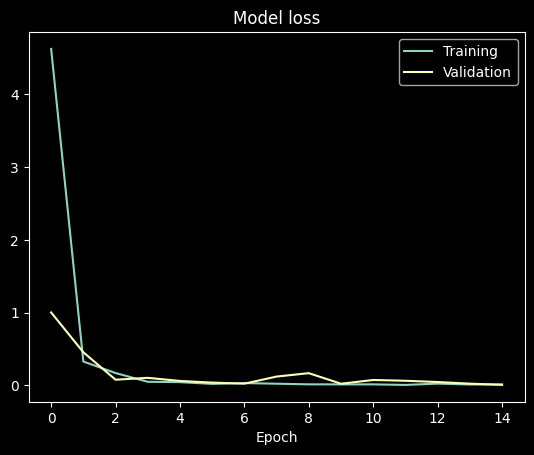

In [10]:
plt.style.use('dark_background')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'upper right')
plt.show()

## Accuracy graph

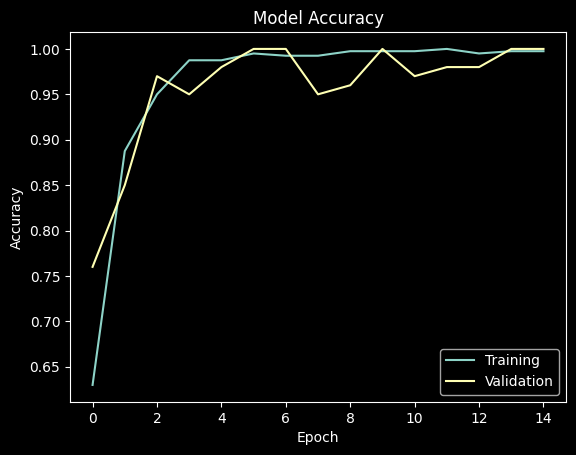

In [11]:
plt.style.use('dark_background')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc = 'lower right')
plt.show()

# 🏁 The End! Feel free to criticize! 🏁